1. Visualize Distribution of Errors (Residuals) for Multiple Linear Regression Using Seaborn's "Diamonds" Dataset

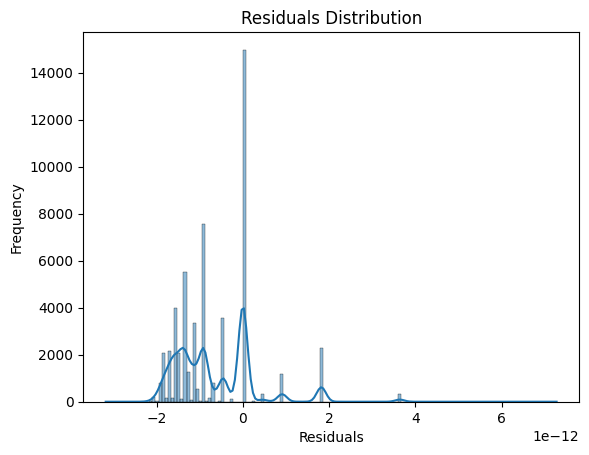

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Use only numeric features
diamonds_numeric = diamonds.select_dtypes(include='number').dropna()

# Define dependent and independent variables
X = diamonds_numeric[['carat', 'depth', 'table', 'price']]
y = diamonds_numeric['price']

# Add constant for intercept term
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Get residuals
residuals = model.resid

# Plot residuals
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


2. Calculate and Print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a Linear Regression Model



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Example data (you can replace this with your dataset)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Train linear regression model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Calculate errors
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.7937181716341474
Mean Absolute Error: 0.7113989107355064
Root Mean Squared Error: 0.8909086213715453


3. Check Assumptions of Linear Regression (Linearity, Homoscedasticity, Multicollinearity)

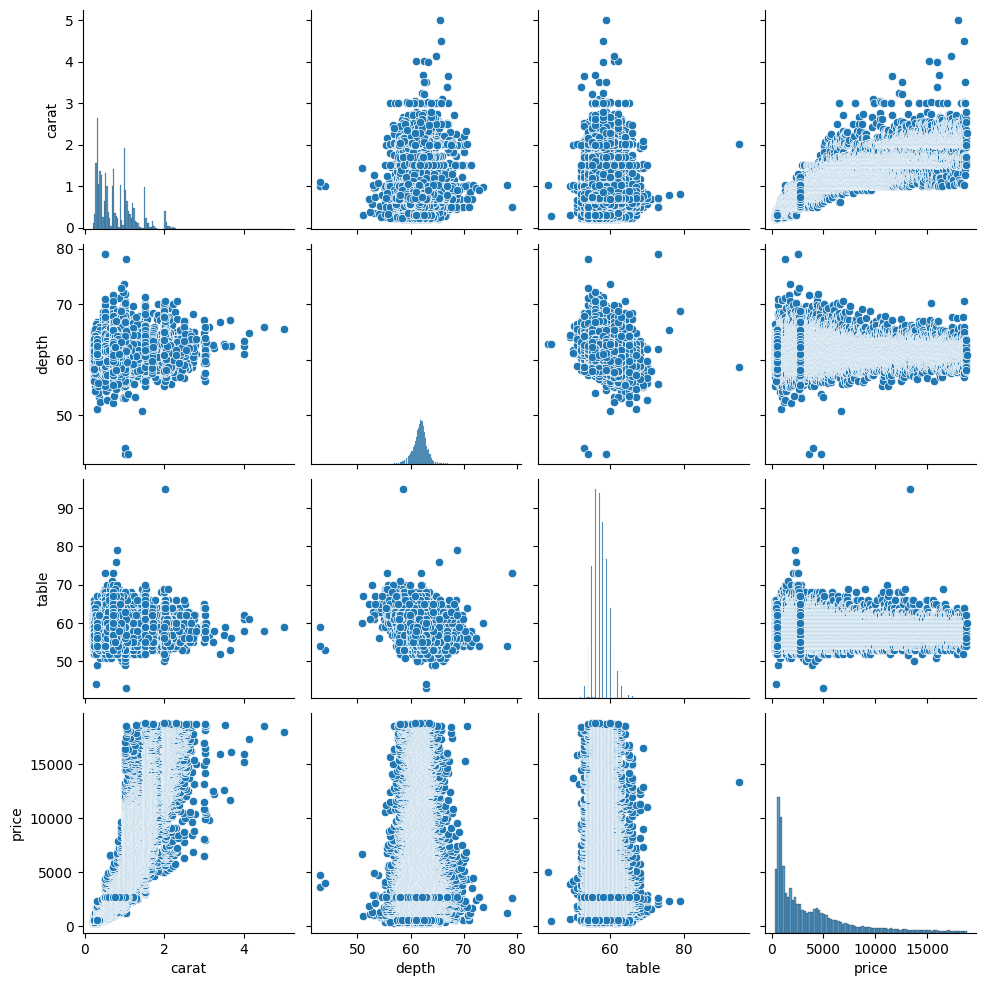

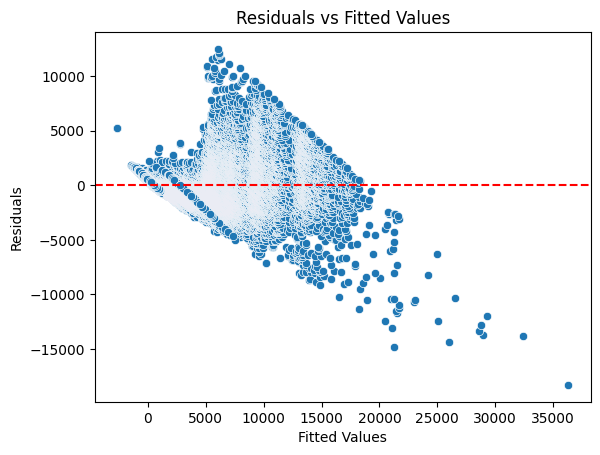

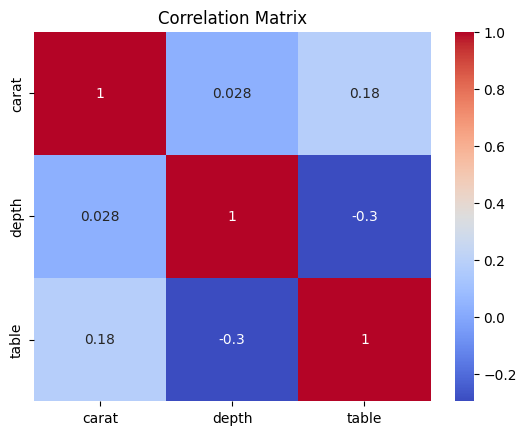

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import numpy as np

# Load dataset
diamonds = sns.load_dataset('diamonds')

# Preprocessing: Use only numeric columns
diamonds_numeric = diamonds.select_dtypes(include='number').dropna()

# Define dependent and independent variables
X = diamonds_numeric[['carat', 'depth', 'table']]
y = diamonds_numeric['price']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# 1. Check linearity: Scatter plot of X vs y
sns.pairplot(diamonds_numeric[['carat', 'depth', 'table', 'price']])
plt.show()

# 2. Residual plot for homoscedasticity
residuals = model.resid
sns.scatterplot(x=model.fittedvalues, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 3. Correlation matrix for multicollinearity
corr_matrix = diamonds_numeric[['carat', 'depth', 'table']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


4. Create a Machine Learning Pipeline with Feature Scaling and Evaluate Different Regression Models


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Example data
X = np.random.rand(100, 1)
y = 3 * X + np.random.randn(100, 1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor())
])

# Train and evaluate models
for model in [pipeline_lr, pipeline_dt]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model: {model.steps[-1][0]} - MAE: {mean_absolute_error(y_test, y_pred)}')


Model: regressor - MAE: 0.689200618206544
Model: regressor - MAE: 1.0082492962954976


5. Simple Linear Regression Model (Model Coefficients, Intercept, and R-squared)

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Create model
model = LinearRegression()
model.fit(X, y)

# Print coefficients, intercept, and R-squared
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')


Coefficient: [[2.20017538]]
Intercept: [0.98437689]
R-squared: 0.3111352232539


6. Analyze Relationship Between Total Bill and Tip Using Simple Linear Regression

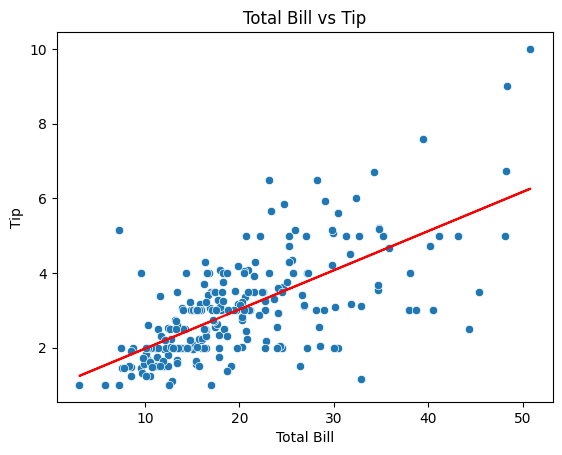

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
tips = sns.load_dataset('tips')

# Define independent and dependent variables
X = tips[['total_bill']]
y = tips['tip']

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Plot data points and regression line
sns.scatterplot(x=X['total_bill'], y=y)
plt.plot(X['total_bill'], model.predict(X), color='red')
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()


7. Fit Linear Regression Model to Synthetic Data with One Feature

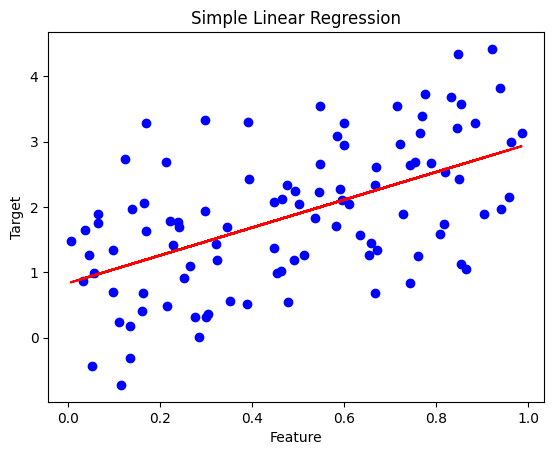

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Predictions
y_pred = model.predict(X)

# Plot the data and the regression line
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title('Simple Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


8. Pickle a Trained Linear Regression Model

In [8]:
import pickle
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Train model
model = LinearRegression()
model.fit(X, y)

# Save the model to a file
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully.")


Model saved successfully.


9. Fit Polynomial Regression Model (Degree 2) and Plot Regression Curve

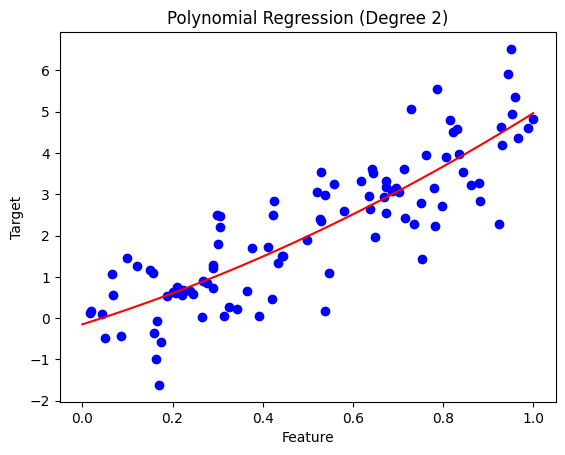

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X**2 + 3 * X + np.random.randn(100, 1)

# Polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions
X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X_range, y_range_pred, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()


10. Generate Synthetic Data for Simple Linear Regression and Fit the Model

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)

# Train the model
model = LinearRegression()
model.fit(X, y)

# Print model's coefficient and intercept
print(f'Coefficient: {model.coef_}')
print(f'Intercept: {model.intercept_}')


Coefficient: [[1.78883728]]
Intercept: [1.22569537]


11. Fit Polynomial Regression Models of Different Degrees to a Synthetic Dataset and Compare Their Performance

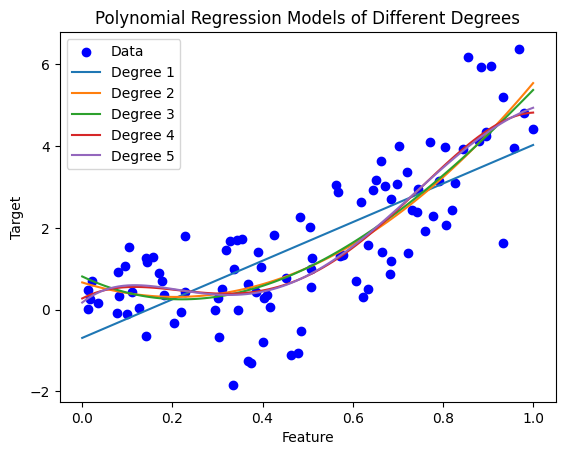

Degree 1 - MSE: 1.403423254110729
Degree 2 - MSE: 1.0381281655698718
Degree 3 - MSE: 1.0348932766062937
Degree 4 - MSE: 1.0042463781967799
Degree 5 - MSE: 1.0031134495823721


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X**3 + 3 * X**2 + np.random.randn(100, 1)  # Polynomial relationship

# Function to fit and plot polynomial regression models of different degrees
def fit_and_compare_poly_models(X, y, degrees):
    plt.scatter(X, y, color='blue', label='Data')
    mse_scores = []

    for degree in degrees:
        # Polynomial feature transformation
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Make predictions
        y_pred = model.predict(X_poly)

        # Calculate MSE
        mse = mean_squared_error(y, y_pred)
        mse_scores.append(mse)

        # Plot the regression curve
        X_range = np.linspace(0, 1, 100).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)
        plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

    # Show results
    plt.title('Polynomial Regression Models of Different Degrees')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

    # Print MSE scores for each degree
    for i, degree in enumerate(degrees):
        print(f'Degree {degree} - MSE: {mse_scores[i]}')

# Fit and compare models for degrees 1 to 5
fit_and_compare_poly_models(X, y, degrees=[1, 2, 3, 4, 5])


12. Fit a Simple Linear Regression Model with Two Features and Print the Model's Coefficients, Intercept, and R-squared Score

In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data with two features
X = np.random.rand(100, 2)  # 100 samples, 2 features
y = 3 * X[:, 0] + 2 * X[:, 1] + np.random.randn(100, 1)  # Linear relationship with noise

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients, intercept, and R-squared score
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')
print(f'R-squared: {model.score(X, y)}')


Coefficients: [[0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.34546442 0.26915477]
 [0.3454644

13. Generate Synthetic Data, Fit a Linear Regression Model, and Visualize the Regression Line Along with the Data Points

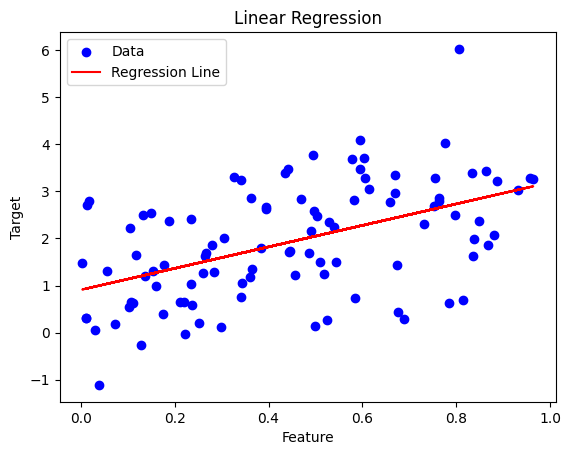

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Regression Line')

# Show plot
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


14. Use Variance Inflation Factor (VIF) to Check for Multicollinearity in a Dataset with Multiple Features

In [14]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Generate synthetic data
X = np.random.rand(100, 3)  # 3 features
X[:, 1] = 2 * X[:, 0] + 1  # Introduce multicollinearity

# Create DataFrame
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2', 'Feature3'])

# Add constant for intercept term
X_const = add_constant(X_df)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Print VIF values
print(vif_data)


    feature       VIF
0     const  0.000000
1  Feature1       inf
2  Feature2       inf
3  Feature3  1.001154


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


15. Generate Synthetic Data for a Polynomial Relationship (Degree 4), Fit a Polynomial Regression Model, and Plot the Regression Curve



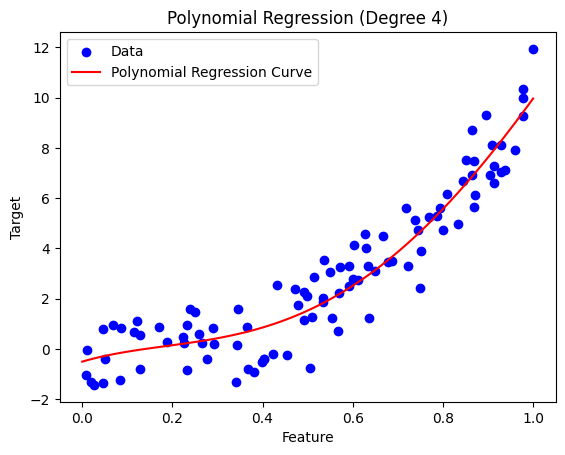

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data with a degree 4 polynomial relationship
X = np.random.rand(100, 1)
y = 2 * X**4 + 3 * X**3 + 5 * X**2 + np.random.randn(100, 1)

# Polynomial feature transformation
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions for plotting
X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot data and regression curve
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


16. Create a Machine Learning Pipeline with Data Standardization and a Multiple Linear Regression Model, and Print the R-squared Score

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Generate synthetic data
X = np.random.rand(100, 3)
y = 3 * X[:, 0] + 2 * X[:, 1] - X[:, 2] + np.random.randn(100, 1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline with scaling and regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
r_squared = pipeline.score(X_test, y_test)
print(f'R-squared score: {r_squared}')


R-squared score: -0.17346176721604606


17. Perform Polynomial Regression (Degree 3) on a Synthetic Dataset and Plot the Regression Curve


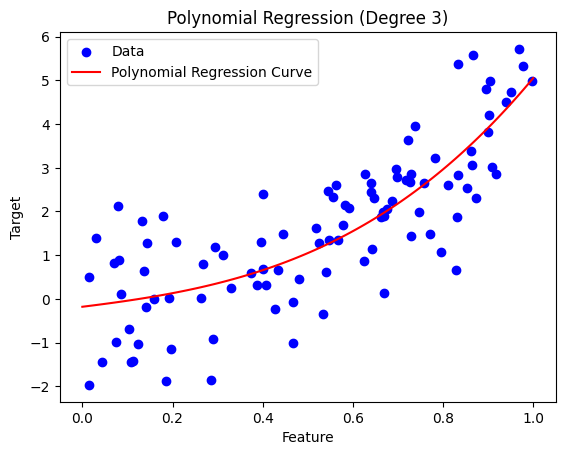

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X**3 + 3 * X**2 + np.random.randn(100, 1)

# Polynomial feature transformation
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Predictions for plotting
X_range = np.linspace(0, 1, 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_range_pred = model.predict(X_range_poly)

# Plot data and regression curve
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Regression Curve')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


18. Perform Multiple Linear Regression on a Synthetic Dataset with 5 Features, Print the R-squared Score and Model Coefficients



In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 5)  # 100 samples, 5 features
y = 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + 4 * X[:, 3] + 5 * X[:, 4] + np.random.randn(100, 1)

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print R-squared score and coefficients
print(f'R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


R-squared: 0.01990226013658547
Coefficients: [[-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482407  0.00083102 -0.28182637 -0.35720373 -0.00640642]
 [-0.09482

19. Generate Synthetic Data for Linear Regression, Fit a Model, and Visualize the Data Points Along with the Regression Line



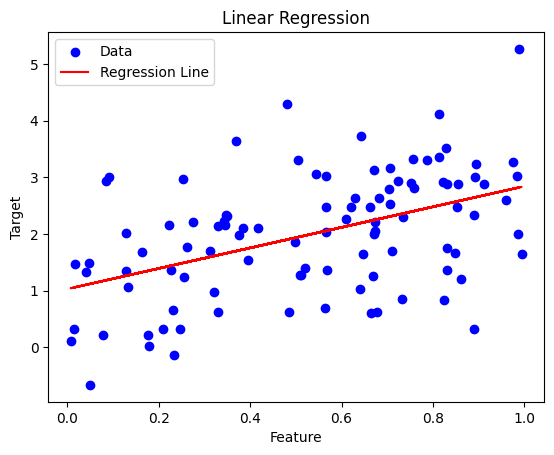

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data')

# Plot the regression line
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red', label='Regression Line')

# Show plot
plt.title('Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()


20. Create a Synthetic Dataset with 3 Features and Perform Multiple Linear Regression. Print the Model's R-squared Score and Coefficients



In [20]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Generate synthetic data with 3 features
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(100, 1)  # Linear relationship with noise

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Print R-squared score and coefficients
print(f'R-squared: {model.score(X, y)}')
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')


R-squared: 0.018425543958331222
Coefficients: [[-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.04447456 -0.01070363]
 [-0.49812778 -0.0

21. Serialize and Deserialize Machine Learning Models Using Joblib Instead of Pickling

In [21]:
import joblib
from sklearn.linear_model import LinearRegression
import numpy as np

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1)  # Linear relationship with noise

# Create and train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Serialize the model to a file
joblib.dump(model, 'linear_regression_model.joblib')

# Deserialize the model from the file
loaded_model = joblib.load('linear_regression_model.joblib')

# Make predictions using the loaded model
y_pred = loaded_model.predict(X)

# Print some predictions
print(f'Predictions: {y_pred[:5]}')


Predictions: [[0.89316165]
 [2.23306126]
 [1.65082892]
 [0.95158729]
 [2.66067333]]


22. Perform Linear Regression with Categorical Features Using One-Hot Encoding. Use the Seaborn 'tips' Dataset

In [22]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load Seaborn's 'tips' dataset
tips = sns.load_dataset('tips')

# One-hot encode the categorical features 'sex' and 'day'
tips_encoded = pd.get_dummies(tips, columns=['sex', 'day'], drop_first=True)

# Define the features and target variable
X = tips_encoded.drop('tip', axis=1)
y = tips_encoded['tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print the model's R-squared score
print(f'R-squared: {model.score(X_test, y_test)}')

# Print the coefficients
print(f'Coefficients: {model.coef_}')


ValueError: Cannot cast object dtype to float64

23. Compare Ridge Regression with Linear Regression on a Synthetic Dataset and Print the Coefficients and R-squared Score

In [23]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(100, 1)  # Linear relationship with noise

# Create and fit Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X, y)

# Create and fit Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X, y)

# Print coefficients and R-squared score for Linear Regression
print(f'Linear Regression Coefficients: {lr_model.coef_}')
print(f'Linear Regression Intercept: {lr_model.intercept_}')
print(f'Linear Regression R-squared: {lr_model.score(X, y)}')

# Print coefficients and R-squared score for Ridge Regression
print(f'Ridge Regression Coefficients: {ridge_model.coef_}')
print(f'Ridge Regression Intercept: {ridge_model.intercept_}')
print(f'Ridge Regression R-squared: {ridge_model.score(X, y)}')


Linear Regression Coefficients: [[ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.34951947]
 [ 0.02611942 -0.43611816  0.349

24. Perform Linear Regression with Cross-Validation on a Synthetic Dataset
python


In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Generate synthetic data
X = np.random.rand(100, 3)  # 100 samples, 3 features
y = 3 * X[:, 0] + 2 * X[:, 1] - 1 * X[:, 2] + np.random.randn(100, 1)  # Linear relationship with noise

# Create the model
model = LinearRegression()

# Perform cross-validation and print the R-squared scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f'Cross-validation R-squared scores: {cv_scores}')
print(f'Mean R-squared score: {cv_scores.mean()}')


Cross-validation R-squared scores: [ 0.00410525 -0.08549285  0.02517997  0.06622007 -0.11286405]
Mean R-squared score: -0.02057032321460504


25. Compare Polynomial Regression Models of Different Degrees and Print the R-squared Score for Each

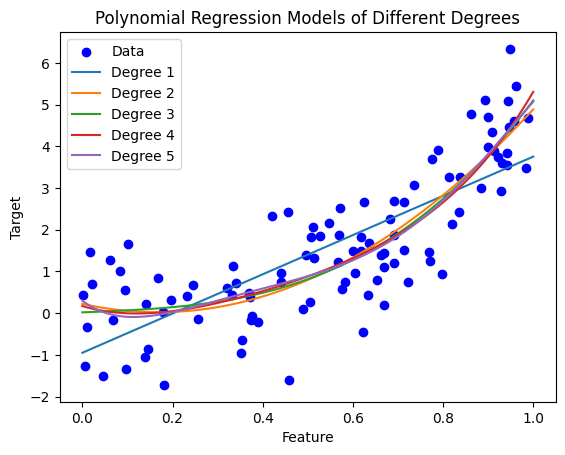

Degree 1 - R-squared: 0.613192973857541
Degree 2 - R-squared: 0.7164192014029098
Degree 3 - R-squared: 0.7190025934110487
Degree 4 - R-squared: 0.7202952751456777
Degree 5 - R-squared: 0.7213378162813892


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Generate synthetic data
X = np.random.rand(100, 1)
y = 2 * X**3 + 3 * X**2 + np.random.randn(100, 1)  # Polynomial relationship

# Function to fit and evaluate polynomial regression models of different degrees
def compare_polynomial_models(X, y, degrees):
    plt.scatter(X, y, color='blue', label='Data')
    r2_scores = []

    for degree in degrees:
        # Polynomial feature transformation
        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        # Fit the model
        model = LinearRegression()
        model.fit(X_poly, y)

        # Make predictions
        y_pred = model.predict(X_poly)

        # Calculate R-squared score
        r2 = r2_score(y, y_pred)
        r2_scores.append(r2)

        # Plot the regression curve
        X_range = np.linspace(0, 1, 100).reshape(-1, 1)
        X_range_poly = poly.transform(X_range)
        y_range_pred = model.predict(X_range_poly)
        plt.plot(X_range, y_range_pred, label=f'Degree {degree}')

    # Show results
    plt.title('Polynomial Regression Models of Different Degrees')
    plt.xlabel('Feature')
    plt.ylabel('Target')
    plt.legend()
    plt.show()

    # Print R-squared scores for each degree
    for i, degree in enumerate(degrees):
        print(f'Degree {degree} - R-squared: {r2_scores[i]}')

# Compare polynomial models for degrees 1 to 5
compare_polynomial_models(X, y, degrees=[1, 2, 3, 4, 5])
